## 다중 선형 회귀 (Multiple Linear Regression)

In [1]:
import numpy as np

x1 = np.array([2, 4, 6, 8]) # 공부 시간
x2 = np.array([0, 4, 2, 3]) # 과외 시간
y = np.array([81, 93, 91, 97]) # 성적

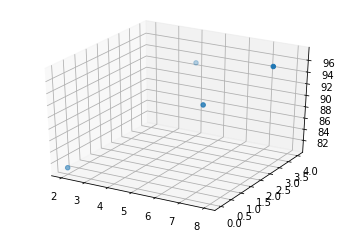

In [2]:
# 데이터 분포 표현
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d') # 1×1 그리드, 첫 번째 서브 플롯 (add_subplot(1, 1, 1))
ax.scatter3D(x1, x2, y);
plt.show() 

In [3]:
# 초기화
a1 = 0
a2 = 0
b = 0

# 학습률
lr = 0.01

# 에포크 수 설정
epochs = 2001

# x값 세기(x1 == x2)
n = len(x1)

In [4]:
# 경사 하강법
for i in range(epochs):
  y_pred = a1 * x1 + a2 * x2 + b # 예측 값 구하는 식
  error = y - y_pred # 오차 = 실제 값 - 예측 값

  a1_diff = (2/n) * sum(-x1 * (error))
  a2_diff = (2/n) * sum(-x2 * (error))
  b_diff = (2/n) * sum(-(error))

  a1 -= lr * a1_diff
  a2 -= lr * a2_diff
  b -= lr * b_diff

  if i % 100 == 0:
    print("epoch = %.f, 기울기 1 = %.04f, 기울기 2 = %.04f, 절편 = %.04f" % (i, a1, a2, b))

print("실제 점수 = ", y)
print("예측 점수 = ", y_pred)

epoch = 0, 기울기 1 = 9.2800, 기울기 2 = 4.2250, 절편 = 1.8100
epoch = 100, 기울기 1 = 9.5110, 기울기 2 = 5.0270, 절편 = 22.9205
epoch = 200, 기울기 1 = 7.3238, 기울기 2 = 4.2950, 절편 = 37.8751
epoch = 300, 기울기 1 = 5.7381, 기울기 2 = 3.7489, 절편 = 48.7589
epoch = 400, 기울기 1 = 4.5844, 기울기 2 = 3.3507, 절편 = 56.6800
epoch = 500, 기울기 1 = 3.7447, 기울기 2 = 3.0608, 절편 = 62.4448
epoch = 600, 기울기 1 = 3.1337, 기울기 2 = 2.8498, 절편 = 66.6404
epoch = 700, 기울기 1 = 2.6890, 기울기 2 = 2.6962, 절편 = 69.6938
epoch = 800, 기울기 1 = 2.3653, 기울기 2 = 2.5845, 절편 = 71.9160
epoch = 900, 기울기 1 = 2.1297, 기울기 2 = 2.5032, 절편 = 73.5333
epoch = 1000, 기울기 1 = 1.9583, 기울기 2 = 2.4440, 절편 = 74.7103
epoch = 1100, 기울기 1 = 1.8336, 기울기 2 = 2.4009, 절편 = 75.5670
epoch = 1200, 기울기 1 = 1.7428, 기울기 2 = 2.3695, 절편 = 76.1904
epoch = 1300, 기울기 1 = 1.6767, 기울기 2 = 2.3467, 절편 = 76.6441
epoch = 1400, 기울기 1 = 1.6286, 기울기 2 = 2.3301, 절편 = 76.9743
epoch = 1500, 기울기 1 = 1.5936, 기울기 2 = 2.3180, 절편 = 77.2146
epoch = 1600, 기울기 1 = 1.5681, 기울기 2 = 2.3092, 절편 = 77.3895
epoch = 17

## 텐서플로 - 선형 회귀 모델

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

Epoch 1/2000
1/1 [==============================] - 1s 519ms/step - loss: 8955.5576
Epoch 2/2000
1/1 [==============================] - 0s 12ms/step - loss: 2144.9468
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 1139.3123
Epoch 4/2000
1/1 [==============================] - 0s 13ms/step - loss: 986.3182
Epoch 5/2000
1/1 [==============================] - 0s 16ms/step - loss: 958.5901
Epoch 6/2000
1/1 [==============================] - 0s 14ms/step - loss: 949.2945
Epoch 7/2000
1/1 [==============================] - 0s 13ms/step - loss: 942.7401
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 936.6218
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 930.6009
Epoch 10/2000
1/1 [==============================] - 0s 13ms/step - loss: 924.6274
Epoch 11/2000
1/1 [==============================] - 0s 9ms/step - loss: 918.6941
Epoch 12/2000
1/1 [==============================] - 0s 9ms/step - loss: 912.7992
Epoch 13/2000

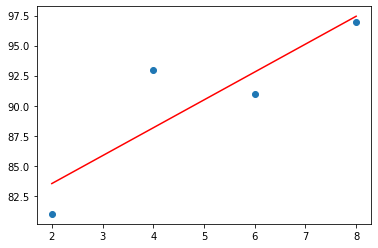

1/1 [==============================] - 0s 170ms/step
7 시간을 공부할 경우, 예상 점수는 95.12 점입니다.


In [7]:
model = Sequential() # 순차모델
model.add(Dense(1, input_dim=1, activation='linear')) # y값 한 개, x값 1개, 선형 회귀

# 오차 수정 --> 경사 하강법(sgd) 사용
# 오차 정도 판단 --> 평균 제곱 오차(mse) 사용
model.compile(optimizer='sgd', loss='mse')

# 오차 최소화 과정 반복
model.fit(x, y, epochs = 2000)

plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r') # 예측 결과 빨간 선 그래프
plt.show()

# 임의의 시간을 넣어 모델 테스트
hour = 7
prediction = model.predict([hour])
print("%.f 시간을 공부할 경우, 예상 점수는 %.02f 점입니다." % (hour, prediction))

## 텐서플로 - 다중 선형 회귀 모델

In [8]:
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]]) # x1과 x2
y = np.array([81, 93, 91, 97])

In [9]:
model = Sequential()

# 입력 변수가 2개(학습 시간, 과외 시간) --> input_dim = 2
model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd', loss='mse')

model.fit(x, y, epochs = 2000)

# 임의의 학습 시간으로 모델 테스트
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("%.f 시간을 공부하고, %.f 시간의 과외를 받을 경우 --> 예상 점수는 %.02f 점입니다." % (hour, private_class, prediction))

Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 8867.3926
Epoch 2/2000
1/1 [==============================] - 0s 16ms/step - loss: 1484.4958
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 959.6795
Epoch 4/2000
1/1 [==============================] - 0s 13ms/step - loss: 917.2323
Epoch 5/2000
1/1 [==============================] - 0s 19ms/step - loss: 908.7510
Epoch 6/2000
1/1 [==============================] - 0s 16ms/step - loss: 902.6997
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 896.8594
Epoch 8/2000
1/1 [==============================] - 0s 12ms/step - loss: 891.0739
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 885.3310
Epoch 10/2000
1/1 [==============================] - 0s 11ms/step - loss: 879.6301
Epoch 11/2000
1/1 [==============================] - 0s 7ms/step - loss: 873.9702
Epoch 12/2000
1/1 [==============================] - 0s 7ms/step - loss: 868.3508
Epoch 13/2000
1/1